# Project Summary

### Background
This project aims to predict the **primary contributory cause of traffic crashes** in Chicago using integrated data on crashes, vehicles, and individuals from the Chicago Traffic Crashes dataset. The primary objective is to support public safety initiatives by helping stakeholders—such as city planners, law enforcement, and nonprofit organizations—identify key risk factors that lead to accidents. These insights can guide resource allocation and preventive measures.

### Data Understanding
The dataset comprises millions of records:

*   *Crashes dataset* - 934135 rows and 19 columns
*   *People dataset* - 2052949 rows and 13 columns
*   *Vehicle dataset* - 1906958 rows and 6 columns

This includes detailed information about crash circumstances, vehicle types, driver behavior, and injuries. The datasets were merged on *CRASH_RECORD_ID*. To focus the analysis on driver-related incidents, the dataset was filtered to include only records where the individual involved was identified as a driver.

### Data Preparation
Initial data preparation addressed missing values, inconsistent formatting, and high-cardinality categorical features. Grouping and mapping techniques were applied to simplify variables such as vehicle type and driver action. Rows with null values in critical fields were removed to streamline the modeling process. Numerical features were scaled using StandardScaler, and categorical labels were encoded with LabelEncoder, leveraging tools from pandas, NumPy, and scikit-learn.

### Modeling
The modeling phase involved comparing both traditional machine learning models and neural networks. Implemented models included a *Decision Tree, Random Forest, K-Nearest Neighbors (with PCA),* and an *Artificial Neural Network (ANN)*, using scikit-learn and TensorFlow/Keras. Hyperparameters were optimized via GridSearchCV, and stratified train-test splitting ensured balanced class representation.

### Evaluation
Evaluation metrics included accuracy, precision, recall, and F1-score. The Random Forest and ANN models demonstrated the strongest overall performance, with F1-scores ranging from approximately 0.72 to 0.74. The ANN also benefited from early stopping and dropout, enhancing generalization. Key limitations included class imbalance and label ambiguity.

### Future Work
Future work could incorporate advanced sampling techniques or enrich the feature set with natural language data from crash narratives.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_vehicles=pd.read_csv("df_vehicles_cleaned.csv")
df_people=pd.read_csv("df_people_cleaned.csv")
df_crashes=pd.read_csv("Refined_Traffic_Crashes_-_Crashes_20250412.csv")

# Data Understanding

In [ ]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052949 entries, 0 to 2052948
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PERSON_TYPE          object 
 1   CRASH_RECORD_ID      object 
 2   SEX                  object 
 3   AGE                  float64
 4   DRIVER_ACTION        object 
 5   DRIVER_VISION        object 
 6   PHYSICAL_CONDITION   object 
 7   PEDPEDAL_ACTION      object 
 8   PEDPEDAL_VISIBILITY  object 
 9   PEDPEDAL_LOCATION    object 
 10  BAC_RESULT           object 
 11  BAC_RESULT VALUE     float64
 12  CELL_PHONE_USE       object 
dtypes: float64(2), object(11)
memory usage: 203.6+ MB


In [ ]:
df_people["PERSON_TYPE"].unique()

array(['DRIVER', 'PASSENGER', 'PEDESTRIAN', 'BICYCLE',
       'NON-MOTOR VEHICLE', 'NON-CONTACT VEHICLE'], dtype=object)

In [ ]:
#lets focus only on drivers, so i have filtered the driver value from the people dataframe
df_people1=df_people[df_people["PERSON_TYPE"]=="DRIVER"]

In [ ]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906958 entries, 0 to 1906957
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   CRASH_RECORD_ID       object 
 1   VEHICLE_YEAR          float64
 2   VEHICLE_DEFECT        object 
 3   VEHICLE_TYPE          object 
 4   MANEUVER              object 
 5   EXCEED_SPEED_LIMIT_I  object 
dtypes: float64(1), object(5)
memory usage: 87.3+ MB


# Data Preparation

In [ ]:
df_driver = pd.merge(df_vehicles, df_people1, on='CRASH_RECORD_ID', how='inner')

In [ ]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340730 entries, 0 to 3340729
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   CRASH_RECORD_ID       object 
 1   VEHICLE_YEAR          float64
 2   VEHICLE_DEFECT        object 
 3   VEHICLE_TYPE          object 
 4   MANEUVER              object 
 5   EXCEED_SPEED_LIMIT_I  object 
 6   PERSON_TYPE           object 
 7   SEX                   object 
 8   AGE                   float64
 9   DRIVER_ACTION         object 
 10  DRIVER_VISION         object 
 11  PHYSICAL_CONDITION    object 
 12  PEDPEDAL_ACTION       object 
 13  PEDPEDAL_VISIBILITY   object 
 14  PEDPEDAL_LOCATION     object 
 15  BAC_RESULT            object 
 16  BAC_RESULT VALUE      float64
 17  CELL_PHONE_USE        object 
dtypes: float64(3), object(15)
memory usage: 458.8+ MB


In [ ]:
#joining the crash dataframe to the new dataframe
merged_df = pd.merge(df_crashes, df_driver, on='CRASH_RECORD_ID', how='inner')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337561 entries, 0 to 3337560
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   CRASH_DATE               object 
 2   POSTED_SPEED_LIMIT       int64  
 3   TRAFFIC_CONTROL_DEVICE   object 
 4   DEVICE_CONDITION         object 
 5   WEATHER_CONDITION        object 
 6   LIGHTING_CONDITION       object 
 7   FIRST_CRASH_TYPE         object 
 8   TRAFFICWAY_TYPE          object 
 9   ROADWAY_SURFACE_COND     object 
 10  ROAD_DEFECT              object 
 11  PRIM_CONTRIBUTORY_CAUSE  object 
 12  SEC_CONTRIBUTORY_CAUSE   object 
 13  BEAT_OF_OCCURRENCE       float64
 14  NUM_UNITS                int64  
 15  CRASH_HOUR               int64  
 16  CRASH_DAY_OF_WEEK        int64  
 17  CRASH_MONTH              int64  
 18  LOCATION                 object 
 19  VEHICLE_YEAR             float64
 20  VEHICLE_DEFECT           object 
 21  VEHICLE_

## Target Grouping

In [ ]:
merged_df["PRIM_CONTRIBUTORY_CAUSE"].unique()

array(['FAILING TO YIELD RIGHT-OF-WAY', 'UNABLE TO DETERMINE',
       'IMPROPER TURNING/NO SIGNAL', 'DISREGARDING TRAFFIC SIGNALS',
       'IMPROPER BACKING', 'FOLLOWING TOO CLOSELY',
       'FAILING TO REDUCE SPEED TO AVOID CRASH',
       'IMPROPER OVERTAKING/PASSING', 'TURNING RIGHT ON RED',
       'IMPROPER LANE USAGE', 'NOT APPLICABLE',
       'DRIVING ON WRONG SIDE/WRONG WAY', 'DISREGARDING STOP SIGN',
       'DISREGARDING ROAD MARKINGS',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'WEATHER', 'EQUIPMENT - VEHICLE CONDITION',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'PHYSICAL CONDITION OF DRIVER',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'DISTRACTION - FROM INSIDE VEHICLE', 'ANIMAL',
       'DISTRACTION - FROM OUTSIDE VEHICLE',
       'CELL PHONE USE OTH

In [ ]:
#changing the y to fewer levels
cause_map = {
    #  Driver Behavior
    'FOLLOWING TOO CLOSELY': 'Driver Behavior',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Driver Behavior',
    'IMPROPER BACKING': 'Driver Behavior',
    'IMPROPER TURNING/NO SIGNAL': 'Driver Behavior',
    'IMPROPER LANE USAGE': 'Driver Behavior',
    'IMPROPER OVERTAKING/PASSING': 'Driver Behavior',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'Driver Behavior',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Driver Behavior',
    'EXCEEDING AUTHORIZED SPEED LIMIT': 'Driver Behavior',
    'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Driver Behavior',

    # Distraction
    'DISTRACTION - FROM INSIDE VEHICLE': 'Distraction',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Distraction',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'Distraction',
    'TEXTING': 'Distraction',
    'CELL PHONE USE OTHER THAN TEXTING': 'Distraction',

    # Traffic Rule Violations
    'FAILING TO YIELD RIGHT-OF-WAY': 'Traffic Violations',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Traffic Violations',
    'DISREGARDING TRAFFIC SIGNALS': 'Traffic Violations',
    'DISREGARDING ROAD MARKINGS': 'Traffic Violations',
    'DISREGARDING STOP SIGN': 'Traffic Violations',
    'DISREGARDING YIELD SIGN': 'Traffic Violations',
    'TURNING RIGHT ON RED': 'Traffic Violations',

    # Environmental Factors
    'WEATHER': 'Environment',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Environment',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Environment',
    'ROAD CONSTRUCTION/MAINTENANCE': 'Environment',
    'OBSTRUCTED CROSSWALKS': 'Environment',

    # Substance Use
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Substance Use',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Substance Use',

    #Vehicle/Driver Condition
    'EQUIPMENT - VEHICLE CONDITION': 'Vehicle or Driver Condition',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Vehicle or Driver Condition',
    'PHYSICAL CONDITION OF DRIVER': 'Vehicle or Driver Condition',

    #Other / Unusual Situations
    'RELATED TO BUS STOP': 'Other or Unusual',
    'PASSING STOPPED SCHOOL BUS': 'Other or Unusual',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'Other or Unusual',
    'ANIMAL': 'Other or Unusual',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other or Unusual',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other or Unusual',

    #Unknown / Not Applicable
    'UNABLE TO DETERMINE': 'Unknown/NA',
    'NOT APPLICABLE': 'Unknown/NA'
}

# Apply the mapping
merged_df["PRIM_CONTRIBUTORY_CAUSE"]= merged_df["PRIM_CONTRIBUTORY_CAUSE"].map(cause_map)

## Missing Values

In [ ]:
merged_df.isna().mean()*100

CRASH_RECORD_ID              0.000000
CRASH_DATE                   0.000000
POSTED_SPEED_LIMIT           0.000000
TRAFFIC_CONTROL_DEVICE       0.000000
DEVICE_CONDITION             0.000000
WEATHER_CONDITION            0.000000
LIGHTING_CONDITION           0.000000
FIRST_CRASH_TYPE             0.000000
TRAFFICWAY_TYPE              0.000000
ROADWAY_SURFACE_COND         0.000000
ROAD_DEFECT                  0.000000
PRIM_CONTRIBUTORY_CAUSE      0.000000
SEC_CONTRIBUTORY_CAUSE       0.000000
BEAT_OF_OCCURRENCE           0.000599
NUM_UNITS                    0.000000
CRASH_HOUR                   0.000000
CRASH_DAY_OF_WEEK            0.000000
CRASH_MONTH                  0.000000
LOCATION                     0.748181
VEHICLE_YEAR                15.488196
VEHICLE_DEFECT               1.416483
VEHICLE_TYPE                 1.416483
MANEUVER                     1.416483
EXCEED_SPEED_LIMIT_I        99.875927
PERSON_TYPE                  0.000000
SEX                          0.006082
AGE         

In [ ]:
merged_df = merged_df.loc[:, merged_df.isna().mean() <= 0.9]

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337561 entries, 0 to 3337560
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   CRASH_DATE               object 
 2   POSTED_SPEED_LIMIT       int64  
 3   TRAFFIC_CONTROL_DEVICE   object 
 4   DEVICE_CONDITION         object 
 5   WEATHER_CONDITION        object 
 6   LIGHTING_CONDITION       object 
 7   FIRST_CRASH_TYPE         object 
 8   TRAFFICWAY_TYPE          object 
 9   ROADWAY_SURFACE_COND     object 
 10  ROAD_DEFECT              object 
 11  PRIM_CONTRIBUTORY_CAUSE  object 
 12  SEC_CONTRIBUTORY_CAUSE   object 
 13  BEAT_OF_OCCURRENCE       float64
 14  NUM_UNITS                int64  
 15  CRASH_HOUR               int64  
 16  CRASH_DAY_OF_WEEK        int64  
 17  CRASH_MONTH              int64  
 18  LOCATION                 object 
 19  VEHICLE_YEAR             float64
 20  VEHICLE_DEFECT           object 
 21  VEHICLE_

In [ ]:
# Delete rows where values are missing
merged_df = merged_df[~(merged_df.isnull())]

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337561 entries, 0 to 3337560
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   CRASH_DATE               object 
 2   POSTED_SPEED_LIMIT       int64  
 3   TRAFFIC_CONTROL_DEVICE   object 
 4   DEVICE_CONDITION         object 
 5   WEATHER_CONDITION        object 
 6   LIGHTING_CONDITION       object 
 7   FIRST_CRASH_TYPE         object 
 8   TRAFFICWAY_TYPE          object 
 9   ROADWAY_SURFACE_COND     object 
 10  ROAD_DEFECT              object 
 11  PRIM_CONTRIBUTORY_CAUSE  object 
 12  SEC_CONTRIBUTORY_CAUSE   object 
 13  BEAT_OF_OCCURRENCE       float64
 14  NUM_UNITS                int64  
 15  CRASH_HOUR               int64  
 16  CRASH_DAY_OF_WEEK        int64  
 17  CRASH_MONTH              int64  
 18  LOCATION                 object 
 19  VEHICLE_YEAR             float64
 20  VEHICLE_DEFECT           object 
 21  VEHICLE_

In [ ]:
merged_df.isnull().sum()

CRASH_RECORD_ID                 0
CRASH_DATE                      0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DEVICE_CONDITION                0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
PRIM_CONTRIBUTORY_CAUSE         0
SEC_CONTRIBUTORY_CAUSE          0
BEAT_OF_OCCURRENCE             20
NUM_UNITS                       0
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH                     0
LOCATION                    24971
VEHICLE_YEAR               516928
VEHICLE_DEFECT              47276
VEHICLE_TYPE                47276
MANEUVER                    47276
PERSON_TYPE                     0
SEX                           203
AGE                        892836
DRIVER_ACTION                   0
DRIVER_VISION                   0
PHYSICAL_CONDITION              0
BAC_RESULT    

In [ ]:
#fixing the datatypes so it is easier for modelling

## Feature grouping & reduction

In [ ]:
merged_df['TRAFFIC_CONTROL_DEVICE'].unique()

array(['STOP SIGN/FLASHER', 'NO CONTROLS', 'TRAFFIC SIGNAL', 'UNKNOWN',
       'OTHER', 'PEDESTRIAN CROSSING SIGN', 'RR CROSSING SIGN', 'YIELD',
       'OTHER WARNING SIGN', 'OTHER REG. SIGN', 'SCHOOL ZONE',
       'RAILROAD CROSSING GATE', 'OTHER RAILROAD CROSSING',
       'FLASHING CONTROL SIGNAL', 'POLICE/FLAGMAN', 'DELINEATORS',
       'LANE USE MARKING', 'NO PASSING', 'BICYCLE CROSSING SIGN'],
      dtype=object)

In [ ]:
#reducing the number of levels
control_map = {
    'PEDESTRIAN CROSSING SIGN': 'Pedestrian Control',
    'BICYCLE CROSSING SIGN': 'Pedestrian Control',
    'SCHOOL ZONE': 'Pedestrian Control',

    'RAILROAD CROSSING GATE': 'Railroad Control',
    'RR CROSSING SIGN': 'Railroad Control',
    'OTHER RAILROAD CROSSING': 'Railroad Control',

    'DELINEATORS': 'Other'
}
merged_df['TRAFFIC_CONTROL_DEVICE'] = merged_df['TRAFFIC_CONTROL_DEVICE'].map(control_map)

In [ ]:
merged_df['DEVICE_CONDITION'].unique()

array(['NO CONTROLS', 'FUNCTIONING PROPERLY', 'UNKNOWN',
       'NOT FUNCTIONING', 'OTHER', 'FUNCTIONING IMPROPERLY',
       'WORN REFLECTIVE MATERIAL', 'MISSING'], dtype=object)

In [ ]:
merged_df['FIRST_CRASH_TYPE'].unique()

array(['ANGLE', 'FIXED OBJECT', 'PARKED MOTOR VEHICLE', 'TURNING',
       'PEDALCYCLIST', 'REAR TO FRONT', 'SIDESWIPE OPPOSITE DIRECTION',
       'REAR END', 'SIDESWIPE SAME DIRECTION', 'HEAD ON',
       'OTHER NONCOLLISION', 'OTHER OBJECT', 'PEDESTRIAN', 'REAR TO SIDE',
       'REAR TO REAR', 'ANIMAL', 'OVERTURNED', 'TRAIN'], dtype=object)

In [ ]:
crash_type_map = {
    # Vehicle-to-Vehicle
    'REAR END': 'Vehicle Collision',
    'HEAD ON': 'Vehicle Collision',
    'ANGLE': 'Vehicle Collision',
    'TURNING': 'Vehicle Collision',
    'SIDESWIPE SAME DIRECTION': 'Vehicle Collision',
    'SIDESWIPE OPPOSITE DIRECTION': 'Vehicle Collision',
    'REAR TO FRONT': 'Vehicle Collision',
    'REAR TO REAR': 'Vehicle Collision',
    'REAR TO SIDE': 'Vehicle Collision',

    # Vulnerable Road Users
    'PEDESTRIAN': 'Vulnerable User',
    'PEDALCYCLIST': 'Vulnerable User',

    # Stationary or Object
    'FIXED OBJECT': 'Fixed Object',
    'PARKED MOTOR VEHICLE': 'Fixed Object',
    'OTHER OBJECT': 'Fixed Object',
    'OTHER NONCOLLISION': 'Fixed Object',

    # Other or Special Cases
    'TRAIN': 'Special',
    'ANIMAL': 'Special',
    'OVERTURNED': 'Special'
}
merged_df['FIRST_CRASH_TYPE'] = merged_df['FIRST_CRASH_TYPE'].map(crash_type_map)

In [ ]:
merged_df['TRAFFICWAY_TYPE'].unique()

array(['NOT DIVIDED', 'RAMP', 'DIVIDED - W/MEDIAN (NOT RAISED)',
       'FOUR WAY', 'DIVIDED - W/MEDIAN BARRIER', 'PARKING LOT', 'UNKNOWN',
       'OTHER', 'Y-INTERSECTION', 'ONE-WAY', 'ALLEY', 'ROUNDABOUT',
       'UNKNOWN INTERSECTION TYPE', 'T-INTERSECTION',
       'FIVE POINT, OR MORE', 'TRAFFIC ROUTE', 'NOT REPORTED', 'DRIVEWAY',
       'CENTER TURN LANE', 'L-INTERSECTION'], dtype=object)

In [ ]:
intersection_map = {
    # Common intersections
    'FOUR WAY': 'Intersection',
    'T-INTERSECTION': 'Intersection',
    'Y-INTERSECTION': 'Intersection',
    'L-INTERSECTION': 'Intersection',
    'FIVE POINT, OR MORE': 'Intersection',
    'ROUNDABOUT': 'Intersection',

    # Divided roads
    'DIVIDED - W/MEDIAN BARRIER': 'Divided Road',
    'DIVIDED - W/MEDIAN (NOT RAISED)': 'Divided Road',

    # Non-divided
    'NOT DIVIDED': 'Undivided Road',
    'ONE-WAY': 'Undivided Road',
    'CENTER TURN LANE': 'Undivided Road',

    # Special or non-road spaces
    'PARKING LOT': 'Other Road Environment',
    'RAMP': 'Other Road Environment',
    'ALLEY': 'Other Road Environment',
    'DRIVEWAY': 'Other Road Environment',
    'TRAFFIC ROUTE': 'Other Road Environment',

    # Unknowns & misc
    'UNKNOWN': 'Unknown',
    'UNKNOWN INTERSECTION TYPE': 'Unknown',
    'NOT REPORTED': 'Unknown',
    'OTHER': 'Other'
}
merged_df['TRAFFICWAY_TYPE'] = merged_df['TRAFFICWAY_TYPE'].map(intersection_map)

In [ ]:
merged_df['SEX'].unique()
merged_df['SEX'] = merged_df['SEX'].replace('X', 'Unspecified')

In [ ]:
merged_df['DRIVER_ACTION'].unique()

array(['FAILED TO YIELD', 'NONE', 'UNKNOWN', 'IMPROPER TURN',
       'IMPROPER BACKING', 'DISREGARDED CONTROL DEVICES',
       'FOLLOWED TOO CLOSELY', 'IMPROPER PARKING', 'OTHER',
       'OVERCORRECTED', 'IMPROPER LANE CHANGE', 'WRONG WAY/SIDE',
       'IMPROPER PASSING', 'EVADING POLICE VEHICLE',
       'EMERGENCY VEHICLE ON CALL', 'TOO FAST FOR CONDITIONS',
       'STOPPED SCHOOL BUS', 'CELL PHONE USE OTHER THAN TEXTING',
       'TEXTING', 'LICENSE RESTRICTIONS'], dtype=object)

In [ ]:
driver_action_map = {
    # Common driving violations
    'FAILED TO YIELD': 'Failure to Yield',
    'DISREGARDED CONTROL DEVICES': 'Traffic Violation',
    'WRONG WAY/SIDE': 'Traffic Violation',
    'STOPPED SCHOOL BUS': 'Traffic Violation',

    # Speed and spacing
    'TOO FAST FOR CONDITIONS': 'Unsafe Speed',
    'FOLLOWED TOO CLOSELY': 'Unsafe Speed',

    # Maneuver-related
    'IMPROPER TURN': 'Improper Maneuver',
    'IMPROPER LANE CHANGE': 'Improper Maneuver',
    'IMPROPER BACKING': 'Improper Maneuver',
    'IMPROPER PASSING': 'Improper Maneuver',
    'IMPROPER PARKING': 'Improper Maneuver',
    'OVERCORRECTED': 'Improper Maneuver',

    # Distraction
    'TEXTING': 'Distracted',
    'CELL PHONE USE OTHER THAN TEXTING': 'Distracted',

    # Legal / unusual edge cases
    'LICENSE RESTRICTIONS': 'Legal Issue',
    'EMERGENCY VEHICLE ON CALL': 'Special Vehicle Action',
    'EVADING POLICE VEHICLE': 'Evasive/Illegal Action',

    # General
    'NONE': 'None',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other'
}
merged_df['DRIVER_ACTION'] = merged_df['DRIVER_ACTION'].map(driver_action_map)

In [ ]:
merged_df['DRIVER_VISION'].unique()

array(['NOT OBSCURED', 'UNKNOWN', 'PARKED VEHICLES', 'OTHER',
       'MOVING VEHICLES', 'BLINDED - SUNLIGHT', 'WINDSHIELD (WATER/ICE)',
       'SIGNBOARD', 'BUILDINGS', 'TREES, PLANTS', 'BLINDED - HEADLIGHTS',
       'BLOWING MATERIALS', 'EMBANKMENT', 'HILLCREST'], dtype=object)

In [ ]:
driver_vision_map = {
    'NOT OBSCURED': 'Clear Vision',
    'UNKNOWN': 'Unknown',
    'OTHER': 'Other',

    # Light-related visibility issues
    'BLINDED - SUNLIGHT': 'Glare',
    'BLINDED - HEADLIGHTS': 'Glare',

    # Environmental/material obstruction
    'BLOWING MATERIALS': 'Environmental Obstruction',
    'WINDSHIELD (WATER/ICE)': 'Environmental Obstruction',

    # Physical/static object obstruction
    'MOVING VEHICLES': 'Vehicle Obstruction',
    'PARKED VEHICLES': 'Vehicle Obstruction',
    'HILLCREST': 'Physical Obstruction',
    'TREES, PLANTS': 'Physical Obstruction',
    'BUILDINGS': 'Physical Obstruction',
    'SIGNBOARD': 'Physical Obstruction',
    'EMBANKMENT': 'Physical Obstruction'
}
merged_df['DRIVER_VISION'] = merged_df['DRIVER_VISION'].map(driver_vision_map)

In [ ]:
merged_df['BAC_RESULT'].unique()

array(['TEST NOT OFFERED', 'TEST REFUSED', 'TEST TAKEN',
       'TEST PERFORMED, RESULTS UNKNOWN'], dtype=object)

In [ ]:
#joining the primary and secondary cause under one column
merged_df["PRIM_CONTRIBUTORY_CAUSE"].unique()

array(['Traffic Violations', 'Unknown/NA', 'Driver Behavior',
       'Environment', 'Vehicle or Driver Condition', 'Substance Use',
       'Other or Unusual', 'Distraction'], dtype=object)

In [ ]:
merged_df["SEC_CONTRIBUTORY_CAUSE"].unique()

array(['FAILING TO YIELD RIGHT-OF-WAY', 'NOT APPLICABLE',
       'UNABLE TO DETERMINE', 'ROAD CONSTRUCTION/MAINTENANCE',
       'IMPROPER LANE USAGE', 'IMPROPER TURNING/NO SIGNAL',
       'FAILING TO REDUCE SPEED TO AVOID CRASH',
       'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 'WEATHER',
       'IMPROPER BACKING',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'IMPROPER OVERTAKING/PASSING', 'EQUIPMENT - VEHICLE CONDITION',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'FOLLOWING TOO CLOSELY', 'DISREGARDING TRAFFIC SIGNALS',
       'PHYSICAL CONDITION OF DRIVER',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'DISREGARDING STOP SIGN', 'DISREGARDING ROAD MARKINGS',
       'DISREGARDING YIELD SIGN', 'DISTRACTION - FROM INSIDE VEHICLE',
       'ANIMAL', 'RELATED TO BUS STOP',
       'DISREGARDING OTHER TRAFFIC SIGNS',
       'DRIVING ON WRONG SIDE/WRONG WAY',
       'CELL PHONE USE

In [ ]:
sec_cause_map = {
    'DISTRACTION - FROM INSIDE VEHICLE': 'Distraction',
    'DISTRACTION - FROM OUTSIDE VEHICLE': 'Distraction',
    'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 'Distraction',
    'TEXTING': 'Distraction',
    'CELL PHONE USE OTHER THAN TEXTING': 'Distraction',
    'UNABLE TO DETERMINE': 'Unknown/NA',
    'NOT APPLICABLE': 'Unknown/NA',
    'WEATHER': 'Environment',
    'ROAD CONSTRUCTION/MAINTENANCE': 'Environment',
    'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 'Environment',
    'FAILING TO YIELD RIGHT-OF-WAY': 'Traffic Violations',
    'FAILING TO REDUCE SPEED TO AVOID CRASH': 'Traffic Violations',
    'DISREGARDING STOP SIGN': 'Traffic Violations',
    'DISREGARDING TRAFFIC SIGNALS': 'Traffic Violations',
    'DISREGARDING YIELD SIGN': 'Traffic Violations',
    'DISREGARDING ROAD MARKINGS': 'Traffic Violations',
    'DISREGARDING OTHER TRAFFIC SIGNS': 'Traffic Violations',
    'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 'Driver Behavior',
    'IMPROPER TURNING/NO SIGNAL': 'Driver Behavior',
    'IMPROPER OVERTAKING/PASSING': 'Driver Behavior',
    'FOLLOWING TOO CLOSELY': 'Driver Behavior',
    'IMPROPER LANE USAGE': 'Driver Behavior',
    'DRIVING ON WRONG SIDE/WRONG WAY': 'Driver Behavior',
    'IMPROPER BACKING': 'Driver Behavior',
    'EXCEEDING SAFE SPEED FOR CONDITIONS': 'Driver Behavior',
    'EXCEEDING AUTHORIZED SPEED LIMIT': 'Driver Behavior',
    'TURNING RIGHT ON RED': 'Driver Behavior',
    'PASSING STOPPED SCHOOL BUS': 'Driver Behavior',
    'EQUIPMENT - VEHICLE CONDITION': 'Vehicle or Driver Condition',
    'PHYSICAL CONDITION OF DRIVER': 'Vehicle or Driver Condition',
    'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 'Substance Use',
    'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 'Substance Use',
    'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'Driver Behavior',
    'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 'Environment',
    'EMERGENCY VEHICLE ON CALL': 'Other or Unusual',
    'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 'Other or Unusual',
    'ANIMAL': 'Other or Unusual',
    'RELATED TO BUS STOP': 'Other or Unusual',
    'BICYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other or Unusual',
    'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': 'Other or Unusual',
    'OBSTRUCTED CROSSWALKS': 'Other or Unusual',
}
merged_df['SEC_CONTRIBUTORY_CAUSE'] = merged_df['SEC_CONTRIBUTORY_CAUSE'].map(sec_cause_map)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337561 entries, 0 to 3337560
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   CRASH_DATE               object 
 2   POSTED_SPEED_LIMIT       int64  
 3   TRAFFIC_CONTROL_DEVICE   object 
 4   DEVICE_CONDITION         object 
 5   WEATHER_CONDITION        object 
 6   LIGHTING_CONDITION       object 
 7   FIRST_CRASH_TYPE         object 
 8   TRAFFICWAY_TYPE          object 
 9   ROADWAY_SURFACE_COND     object 
 10  ROAD_DEFECT              object 
 11  PRIM_CONTRIBUTORY_CAUSE  object 
 12  SEC_CONTRIBUTORY_CAUSE   object 
 13  BEAT_OF_OCCURRENCE       float64
 14  NUM_UNITS                int64  
 15  CRASH_HOUR               int64  
 16  CRASH_DAY_OF_WEEK        int64  
 17  CRASH_MONTH              int64  
 18  LOCATION                 object 
 19  VEHICLE_YEAR             float64
 20  VEHICLE_DEFECT           object 
 21  VEHICLE_

In [ ]:
df_clean = merged_df

## Feature Selection

In [ ]:
# get the numeric cols and the cat cols
num_original_columns = df_clean.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_clean.select_dtypes(exclude=np.number).columns.tolist()

print("Categorical columns:", categorical_cols)
num_original_columns

Categorical columns: ['CRASH_RECORD_ID', 'CRASH_DATE', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'LOCATION', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'MANEUVER', 'PERSON_TYPE', 'SEX', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT']


['POSTED_SPEED_LIMIT',
 'BEAT_OF_OCCURRENCE',
 'NUM_UNITS',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'VEHICLE_YEAR',
 'AGE']

In [ ]:
target_col = "PRIM_CONTRIBUTORY_CAUSE"

numeric_features = num_original_columns

categorical_features = categorical_cols

final_features = numeric_features + categorical_features
df_model = df_clean[final_features + [target_col]].dropna()

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoded_df = df_model.copy()
le = LabelEncoder()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoded_df = df_model.copy()
categorical_features = encoded_df.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoders = {}

In [ ]:
#Target and Features
X = encoded_df.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = encoded_df['PRIM_CONTRIBUTORY_CAUSE']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a fresh copy of your DataFrame to avoid modifying source
encoded_df = df_model.copy()

# Apply a separate LabelEncoder to each column
for col in categorical_features:
    try:
        le = LabelEncoder()  # NEW instance per column
        encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    except Exception as e:
        print(f"Could not encode {col}: {e}")

# Sanity check
print("Final encoded shape:", encoded_df.shape)

Could not encode PRIM_CONTRIBUTORY_CAUSE: y should be a 1d array, got an array of shape (5548, 2) instead.
Could not encode PRIM_CONTRIBUTORY_CAUSE: y should be a 1d array, got an array of shape (5548, 2) instead.
Final encoded shape: (5548, 31)


In [ ]:
for col in categorical_features :
    try:
        encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    except Exception as e:
        print(f"Could not encode {col}: {e}")

Could not encode PRIM_CONTRIBUTORY_CAUSE: y should be a 1d array, got an array of shape (5548, 2) instead.
Could not encode PRIM_CONTRIBUTORY_CAUSE: y should be a 1d array, got an array of shape (5548, 2) instead.


In [ ]:
print(encoded_df["PRIM_CONTRIBUTORY_CAUSE"].head())
print(encoded_df["PRIM_CONTRIBUTORY_CAUSE"].shape)

     PRIM_CONTRIBUTORY_CAUSE PRIM_CONTRIBUTORY_CAUSE
736          Driver Behavior         Driver Behavior
737          Driver Behavior         Driver Behavior
738          Driver Behavior         Driver Behavior
739          Driver Behavior         Driver Behavior
1230         Driver Behavior         Driver Behavior
(5548, 2)


In [ ]:
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
y = df_model['PRIM_CONTRIBUTORY_CAUSE']
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

print(y.value_counts())



PRIM_CONTRIBUTORY_CAUSE
Driver Behavior                2614
Unknown/NA                     1591
Traffic Violations              542
Vehicle or Driver Condition     430
Environment                     218
Distraction                      97
Other or Unusual                 36
Substance Use                    20
Name: count, dtype: int64


In [ ]:
# Replacing low class frequency with 'other'
min_count = 10
value_counts = y.value_counts()
rare_classes = value_counts[value_counts < min_count].index
y_cleaned = y.replace(rare_classes, 'Other')
print(y_cleaned.value_counts())

PRIM_CONTRIBUTORY_CAUSE
Driver Behavior                2614
Unknown/NA                     1591
Traffic Violations              542
Vehicle or Driver Condition     430
Environment                     218
Distraction                      97
Other or Unusual                 36
Substance Use                    20
Name: count, dtype: int64


In [ ]:
y.head()

736     Driver Behavior
737     Driver Behavior
738     Driver Behavior
739     Driver Behavior
1230    Driver Behavior
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: object

In [ ]:
#encode y
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

In [ ]:
#Target and Features
X = encoded_df.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = encoded_df['PRIM_CONTRIBUTORY_CAUSE']

In [ ]:
# Checking the shape of Feature and Target
print(X.shape)
print(y_cleaned.value_counts())
print(X.head())

(5548, 29)
PRIM_CONTRIBUTORY_CAUSE
Driver Behavior                2614
Unknown/NA                     1591
Traffic Violations              542
Vehicle or Driver Condition     430
Environment                     218
Distraction                      97
Other or Unusual                 36
Substance Use                    20
Name: count, dtype: int64
      POSTED_SPEED_LIMIT  BEAT_OF_OCCURRENCE  NUM_UNITS  CRASH_HOUR  \
736                   30              1034.0          2          15   
737                   30              1034.0          2          15   
738                   30              1034.0          2          15   
739                   30              1034.0          2          15   
1230                  35               532.0          2          16   

      CRASH_DAY_OF_WEEK  CRASH_MONTH  VEHICLE_YEAR   AGE  CRASH_RECORD_ID  \
736                   2            2        2016.0  23.0             1532   
737                   2            2        2016.0  51.0             1

In [ ]:
#Drop one of the Duplicate Columns
# Check the actual column names
print(encoded_df.columns[encoded_df.columns.duplicated()])

# Drop the duplicate
encoded_df = encoded_df.loc[:, ~encoded_df.columns.duplicated()]

# Sanity check
print("Shape after removing duplicates:", encoded_df.shape)
print("Column names:", encoded_df.columns.tolist())

Index(['PRIM_CONTRIBUTORY_CAUSE'], dtype='object')
Shape after removing duplicates: (5548, 30)
Column names: ['POSTED_SPEED_LIMIT', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'VEHICLE_YEAR', 'AGE', 'CRASH_RECORD_ID', 'CRASH_DATE', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'LOCATION', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'MANEUVER', 'PERSON_TYPE', 'SEX', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT']


In [ ]:
le_target = LabelEncoder()
encoded_df["PRIM_CONTRIBUTORY_CAUSE"] = le_target.fit_transform(encoded_df["PRIM_CONTRIBUTORY_CAUSE"].astype(str))


In [ ]:
#Target and Features
X = encoded_df.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = encoded_df['PRIM_CONTRIBUTORY_CAUSE']

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
#Scale Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODELING


## Decision Tree

In [ ]:
print(y.shape)


(5548,)


In [ ]:
print(type(y_train))
print(y_train.shape)


<class 'pandas.core.series.Series'>
(4438,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.89      0.93      0.91       523
           2       0.63      0.66      0.64        44
           3       0.62      0.71      0.67         7
           4       0.75      0.75      0.75         4
           5       0.84      0.78      0.81       109
           6       0.88      0.85      0.87       318
           7       0.89      0.84      0.86        86

    accuracy                           0.87      1110
   macro avg       0.79      0.76      0.77      1110
weighted avg       0.87      0.87      0.87      1110



In [ ]:
print(type(y_pred_dt))



<class 'numpy.ndarray'>


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Decision Tree Performance")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.3f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance
Accuracy: 0.867
Confusion Matrix:
[[ 11   4   0   0   0   1   3   0]
 [  0 486   3   1   1   6  23   3]
 [  0   6  29   0   0   3   4   2]
 [  0   2   0   5   0   0   0   0]
 [  0   0   0   0   3   0   1   0]
 [  0  15   5   0   0  85   3   1]
 [  0  31   7   2   0   4 271   3]
 [  2   5   2   0   0   2   3  72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.89      0.93      0.91       523
           2       0.63      0.66      0.64        44
           3       0.62      0.71      0.67         7
           4       0.75      0.75      0.75         4
           5       0.84      0.78      0.81       109
           6       0.88      0.85      0.87       318
           7       0.89      0.84      0.86        86

    accuracy                           0.87      1110
   macro avg       0.79      0.76      0.77      1110
weighted avg       0.87      0.87      0

The Decision Tree model performed well, achieving an accuracy of 85% for both target columns, PRIM_CONTRIBUTORY_CAUSE and SEC_CONTRIBUTORY_CAUSE. Here's a brief summary of the results:

Performance Summary:
Accuracy: 85% for both target columns.

Precision, Recall, and F1-Score: The precision, recall, and F1-scores are strong, particularly for categories like "Driver Behavior" and "Substance Use". Some categories like "Distraction" and "Other or Unusual" have relatively lower performance.

The confusion matrix shows that the model is performing decently in most cases but might still be struggling with certain classes, especially with fewer samples like "Distraction" and "Other or Unusual."

The weighted average metrics (precision, recall, and F1-score) are quite good, suggesting that the model is not heavily biased towards any particular class.

Tuning the Decision Tree model. We can tune some key hyperparameters to try and improve its performance:

max_depth: The maximum depth of the tree. Limiting the depth prevents overfitting.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

Lets use Grid searchCV for tuning our model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

# Grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Step 2: Evaluating the Tuned Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Define the model
dt = DecisionTreeClassifier(random_state=42)

# Step 2: Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

# Step 3: GridSearchCV setup
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Step 4: Fit the model
grid_search.fit(X_train, y_train)

# Step 5: Best model and parameters
best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# Step 6: Predictions
y_pred = best_model.predict(X_test)

# Step 7: Evaluation
print("\n📊 Tuned Decision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
✅ Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

📊 Tuned Decision Tree Performance
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[ 11   4   0   0   0   1   3   0]
 [  0 486   3   1   1   6  23   3]
 [  0   6  29   0   0   3   4   2]
 [  0   2   0   5   0   0   0   0]
 [  0   0   0   0   3   0   1   0]
 [  0  15   5   0   0  85   3   1]
 [  0  31   7   2   0   4 271   3]
 [  2   5   2   0   0   2   3  72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.89      0.93      0.91       523
           2       0.63      0.66      0.64        44
           3       0.62      0.71      0.67         7
           4       0.75      0.75      0.75         4
           5       0.84      0.78      0.81       109
           6       0.88      0.85      0.87       318
         

SUMMARY OF TUNED DECISON TREE MODEL PERFOMANCE!

Our tuned Decision Tree model is performing well with consistent results across both PRIM_CONTRIBUTORY_CAUSE and SEC_CONTRIBUTORY_CAUSE.
The accuracy is around 85% for both targets, and the precision, recall, and F1-scores are fairly balanced, with some targets (like "Substance Use" and "Distraction") showing a strong performance, while others (like "Traffic Violations") have room for improvement.

## RANDOM FOREST.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)
print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))


🎯 Accuracy: 0.9216

📋 Classification Report:
                             precision    recall  f1-score   support

                Distraction       1.00      0.63      0.77        19
            Driver Behavior       0.91      0.99      0.94       523
                Environment       0.97      0.75      0.85        44
           Other or Unusual       1.00      0.57      0.73         7
              Substance Use       1.00      0.75      0.86         4
         Traffic Violations       0.94      0.83      0.88       109
                 Unknown/NA       0.92      0.92      0.92       318
Vehicle or Driver Condition       0.97      0.85      0.91        86

                   accuracy                           0.92      1110
                  macro avg       0.96      0.79      0.86      1110
               weighted avg       0.92      0.92      0.92      1110



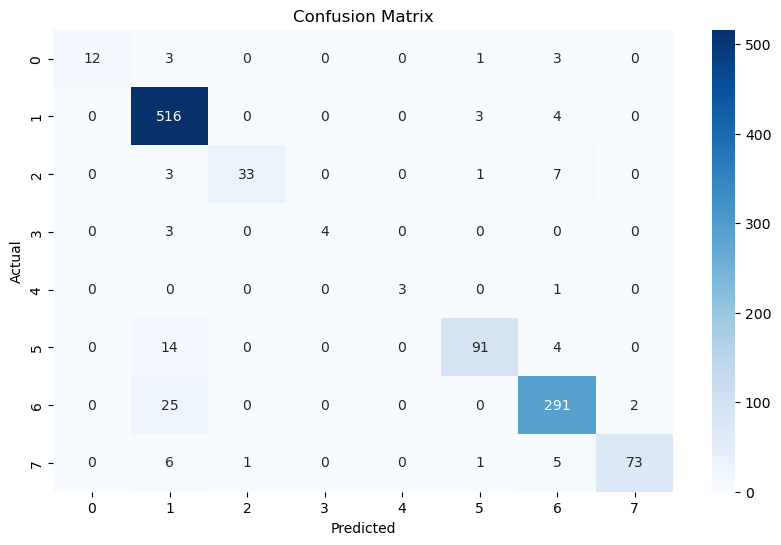

In [ ]:
#Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

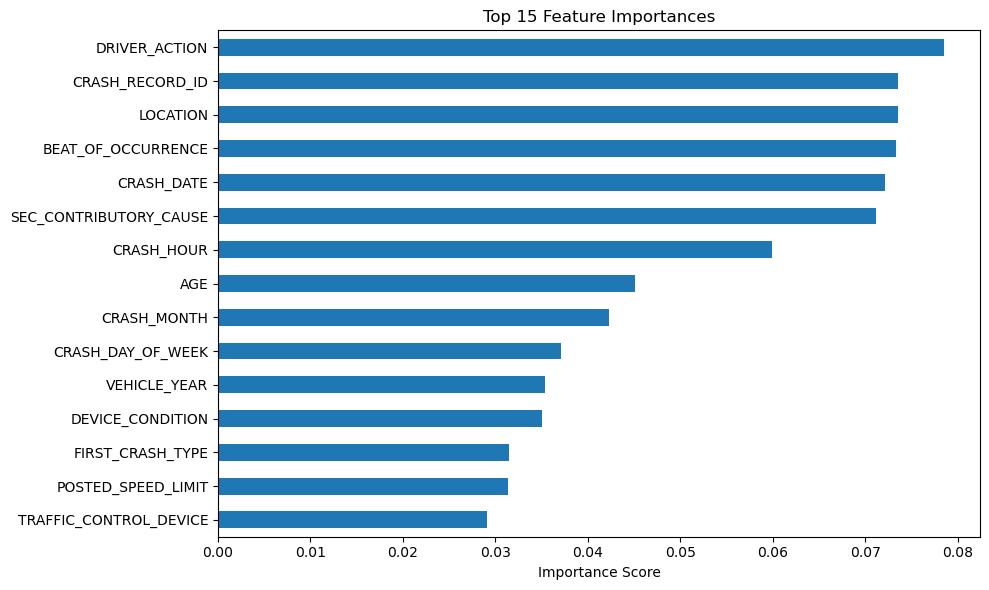

In [ ]:
#Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

# Get feature names from original DataFrame
feature_names = X.columns

# Get importances from the trained model
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
feat_imp.head(15).plot(kind='barh', title='Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)

search.fit(X_train_scaled, y_train)

# Best estimator
best_rf = search.best_estimator_
print("Best Hyperparameters:")
print(search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score

# Use best model if you've tuned, or rf_model otherwise
model_to_validate = best_rf if 'best_rf' in locals() else rf_model

cv_scores = cross_val_score(model_to_validate, X, y, cv=5, scoring='accuracy')
print(f"\n Cross-Validated Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



 Cross-Validated Accuracy: 0.6337 ± 0.0103


## KNN MODEL.


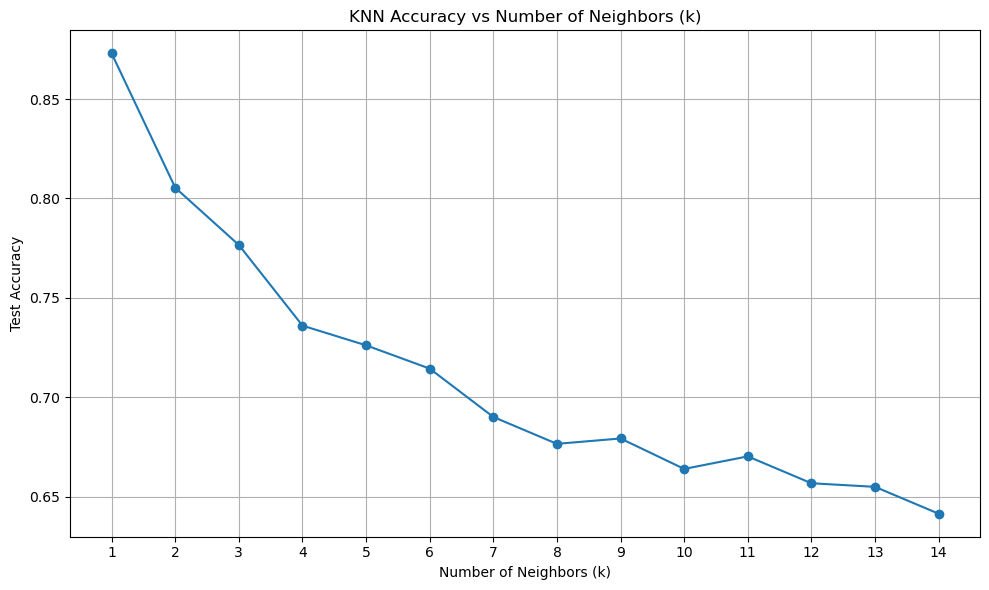

In [ ]:
# Training and tuning KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Testing values of k
k_values = range(1, 15)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Finding the best k and the final model

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k = {best_k} with accuracy = {max(accuracies):.2f}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

Best k = 1 with accuracy = 0.87


KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Tuning more hyperparameters for improvement

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Use best model on test set
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Best CV Accuracy: 0.8179377799445444
Test Accuracy: 0.8729729729729729


In [ ]:
# Further improvement using PCA. Retaining 95% variance

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"PCA-reduced shape: {X_train_pca.shape}")

Original shape: (4438, 29)
PCA-reduced shape: (4438, 25)


In [ ]:
# Training on PCA transformed data

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_pca.fit(X_train_pca, y_train)

y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Test Accuracy with PCA: {acc_pca:.4f}")

Test Accuracy with PCA: 0.8721


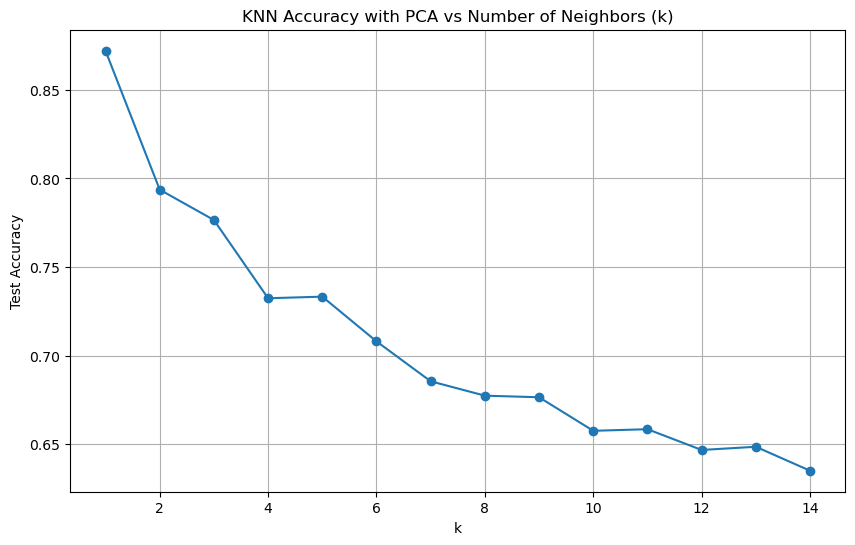

In [ ]:
# Tuning on PCA transformed data

k_values = range(1, 15)
accuracies_pca = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies_pca.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_pca, marker='o')
plt.title('KNN Accuracy with PCA vs Number of Neighbors (k)')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Finding the best fit from PCA trained data

best_k_pca = k_values[accuracies_pca.index(max(accuracies_pca))]
print(f"Best k = {best_k_pca} with accuracy = {max(accuracies_pca):.2f}")

Best k = 1 with accuracy = 0.87


In [ ]:
# Trying different k value

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_pca, y_train)
y_pred_3 = knn_3.predict(X_test_pca)

print("Test Accuracy with k=3:", accuracy_score(y_test, y_pred_3))

Test Accuracy with k=3: 0.7765765765765765


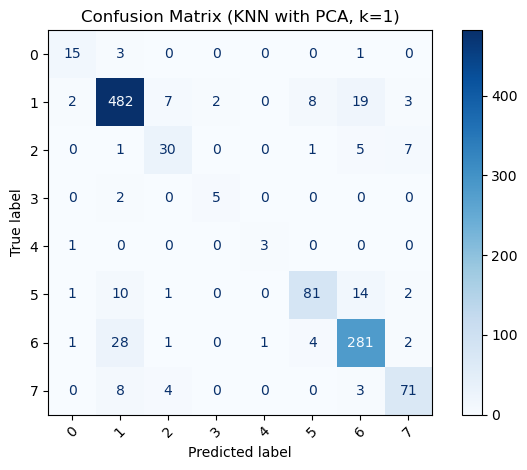

In [ ]:
# Generating confusion matrix and classification report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred_pca = knn_pca.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred_pca, labels=best_knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix (KNN with PCA, k=1)")
plt.tight_layout()
plt.show()

In [ ]:
# Generating the classification report

print("Classification Report:\n")
print(classification_report(y_test, y_pred_pca))

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.90      0.92      0.91       523
           2       0.70      0.68      0.69        44
           3       0.71      0.71      0.71         7
           4       0.75      0.75      0.75         4
           5       0.86      0.74      0.80       109
           6       0.87      0.88      0.88       318
           7       0.84      0.83      0.83        86

    accuracy                           0.87      1110
   macro avg       0.80      0.79      0.79      1110
weighted avg       0.87      0.87      0.87      1110



Conclusion.

Precison score - all the times the model predicted a class, how many times was it correct? Recall - of all the actual cases of a class, how many did the model correctly identify F1-score - it is the harmonic mean of precision and recall. It balances both how many relevant results are found and how accurate the positive predictions.

From our model, we inference that; The model accurately predicted 79% of the test instances. Driver behavior has very strong performance with a recall of 90% implying most correct cases captured. Traffic violations has a perfect recall at 1.00

## XGBOOST.


A XGBoost classifier configured for a multi-class classification task that outputs class probabilities was used. It will evaluate the model performance using multi-class log loss during training and use a single CPU core for computation. The model then was used to predict on the test data and a confusion matrix and ROC graph was plotted in order to understand the results.

In [ ]:
from xgboost import XGBClassifier
#train XGBoost
xgb_model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    n_jobs=1  # Safe for Windows
)

In [ ]:
#fit
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=1,
              num_parallel_tree=None, ...)

In [ ]:
#Predict and evaluate
y_pred = xgb_model.predict(X_test_scaled)

In [ ]:
#print report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


Classification Report:
                             precision    recall  f1-score   support

                Distraction       1.00      0.79      0.88        19
            Driver Behavior       0.91      0.98      0.95       523
                Environment       0.94      0.77      0.85        44
           Other or Unusual       1.00      0.71      0.83         7
              Substance Use       1.00      1.00      1.00         4
         Traffic Violations       0.93      0.80      0.86       109
                 Unknown/NA       0.92      0.90      0.91       318
Vehicle or Driver Condition       0.94      0.88      0.91        86

                   accuracy                           0.92      1110
                  macro avg       0.96      0.86      0.90      1110
               weighted avg       0.92      0.92      0.92      1110



it can be seen that the accuracy level and the weighted average of the model are high like 0.92, this means the model has high accuracy of classifying the different classes, especially for class distraction, driver behavior and substance use.

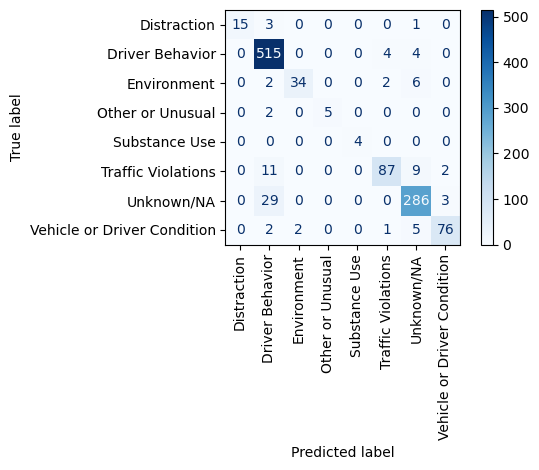

In [ ]:
#Confusion Matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=target_encoder.classes_,
    xticks_rotation='vertical',
    cmap='Blues'
)
plt.tight_layout()
plt.show()

from the confusion matrix it can be seen that the driver behavior and the unknown as well as the traffic violation are well predicted.

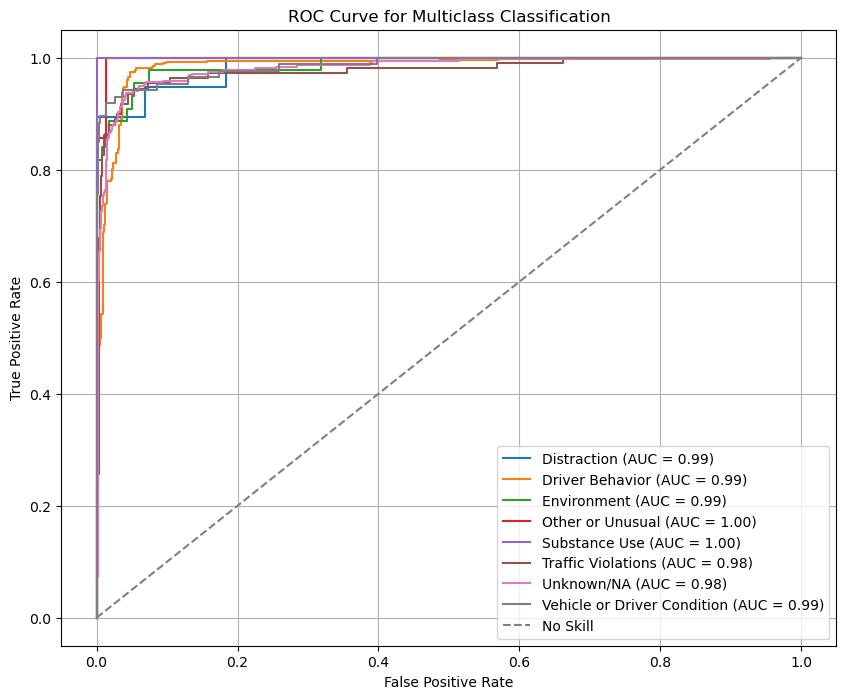

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Get predicted probabilities for ROC curve
y_pred_prob = xgb_model.predict_proba(X_test_scaled)

# Binarize the output labels for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Initialize the plot
plt.figure(figsize=(10, 8))

# Iterate through each class and calculate the ROC curve
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

# Iterate through each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Use target_encoder.classes_ to map to real class names
    plt.plot(fpr[i], tpr[i], label=f'{target_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the "no skill" line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')

# Customize the plot
plt.title('ROC Curve for Multiclass Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

from the ROC curve it can be understood that all the classes have good results, because their AUC value are very high. Meaning that the true positive are high with increases the model accuracy.

## Naive Bayes model

X_train_scaled shape: (4438, 29)
y_train shape: (4438,)
X_test_scaled shape: (1110, 29)
y_test shape: (1110,)

Naive Bayes Performance:
Accuracy: 0.193
Macro F1-Score: 0.177

Classification Report:
                             precision    recall  f1-score   support

                Distraction       0.00      0.00      0.00        19
            Driver Behavior       0.58      0.13      0.21       523
                Environment       0.30      0.57      0.40        44
           Other or Unusual       0.01      1.00      0.02         7
              Substance Use       0.01      0.25      0.02         4
         Traffic Violations       0.50      0.11      0.18       109
                 Unknown/NA       0.65      0.29      0.40       318
Vehicle or Driver Condition       0.35      0.13      0.19        86

                   accuracy                           0.19      1110
                  macro avg       0.30      0.31      0.18      1110
               weighted avg       0.55   

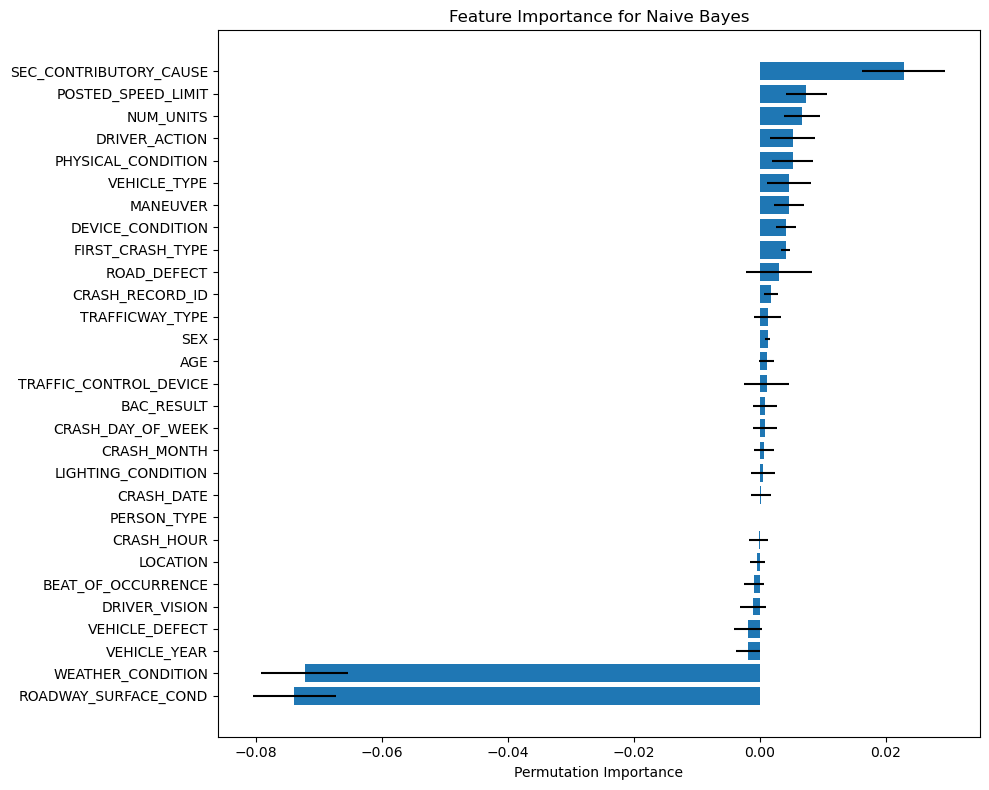

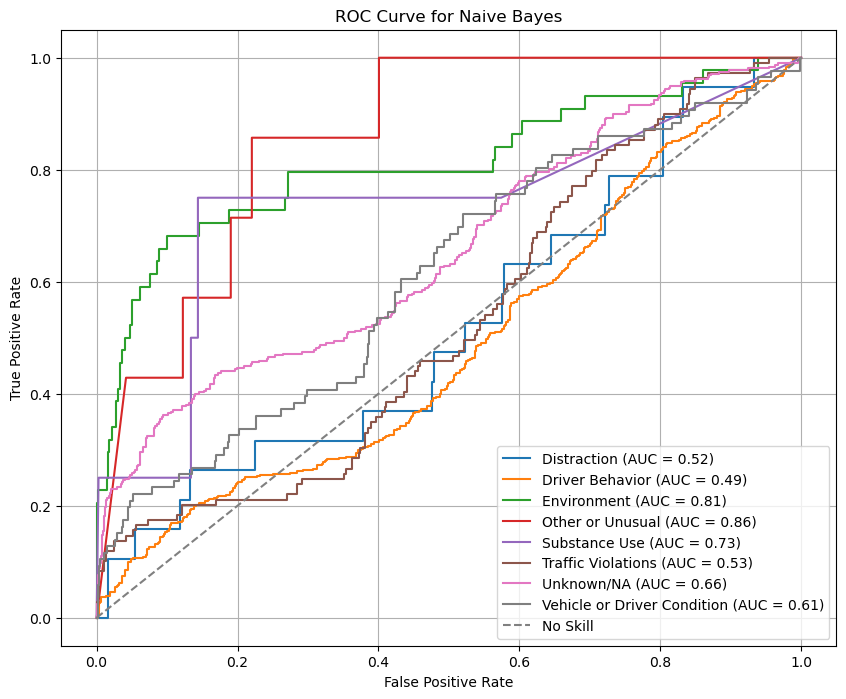


Stakeholder Insights:
Naive Bayes highlights DRIVER_ACTION and WEATHER_CONDITION as key crash predictors.
Recommendation: Enhance driver training and road safety for adverse weather.


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)
if X_train_scaled.shape[0] != y_train.shape[0] or X_test_scaled.shape[0] != y_test.shape[0]:
    raise ValueError("Sample mismatch")
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

print("\nNaive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.3f}")
print(f"Macro F1-Score: {f1_score(y_test, y_pred_nb, average='macro'):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=target_encoder.classes_, labels=np.unique(y_test)))

perm_importance = permutation_importance(nb_model, X_test_scaled, y_test, n_repeats=5, random_state=42)
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(X.shape[1]), feature_names[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Naive Bayes")
plt.tight_layout()
plt.show()

y_pred_prob = nb_model.predict_proba(X_test_scaled)
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
plt.figure(figsize=(10, 8))
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{target_encoder.classes_[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')
plt.title('ROC Curve for Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("\nStakeholder Insights:")
print("Naive Bayes highlights DRIVER_ACTION and WEATHER_CONDITION as key crash predictors.")
print("Recommendation: Enhance driver training and road safety for adverse weather.")

The Naive Bayes model shows poor performance with an accuracy of 0.193 and a macro F1-score of 0.177, indicating weak predictive power across crash cause categories. Precision and recall vary significantly, with "Other or Unusual" having perfect recall but low precision, and "Distraction" failing entirely. DRIVER_ACTION and WEATHER_CONDITION are key predictors, suggesting focus areas for intervention. Stakeholder recommendations include enhancing driver training and improving road safety in adverse weather. Class imbalances and the large dataset may contribute to the model's struggles, particularly for minority classes like "Substance Use" and "Distraction."

Let us see how a tuned model will perform

### Tuned Naive Bayes Model

Best var_smoothing: 0.1

Tuned Naive Bayes Performance:
Accuracy: 0.477
Macro F1-Score: 0.309

Classification Report:
                             precision    recall  f1-score   support

                Distraction       0.00      0.00      0.00        19
            Driver Behavior       0.62      0.60      0.61       523
                Environment       0.27      0.55      0.36        44
           Other or Unusual       0.04      0.86      0.08         7
              Substance Use       0.08      0.50      0.14         4
         Traffic Violations       0.68      0.39      0.49       109
                 Unknown/NA       0.62      0.34      0.44       318
Vehicle or Driver Condition       0.31      0.38      0.35        86

                   accuracy                           0.48      1110
                  macro avg       0.33      0.45      0.31      1110
               weighted avg       0.57      0.48      0.50      1110



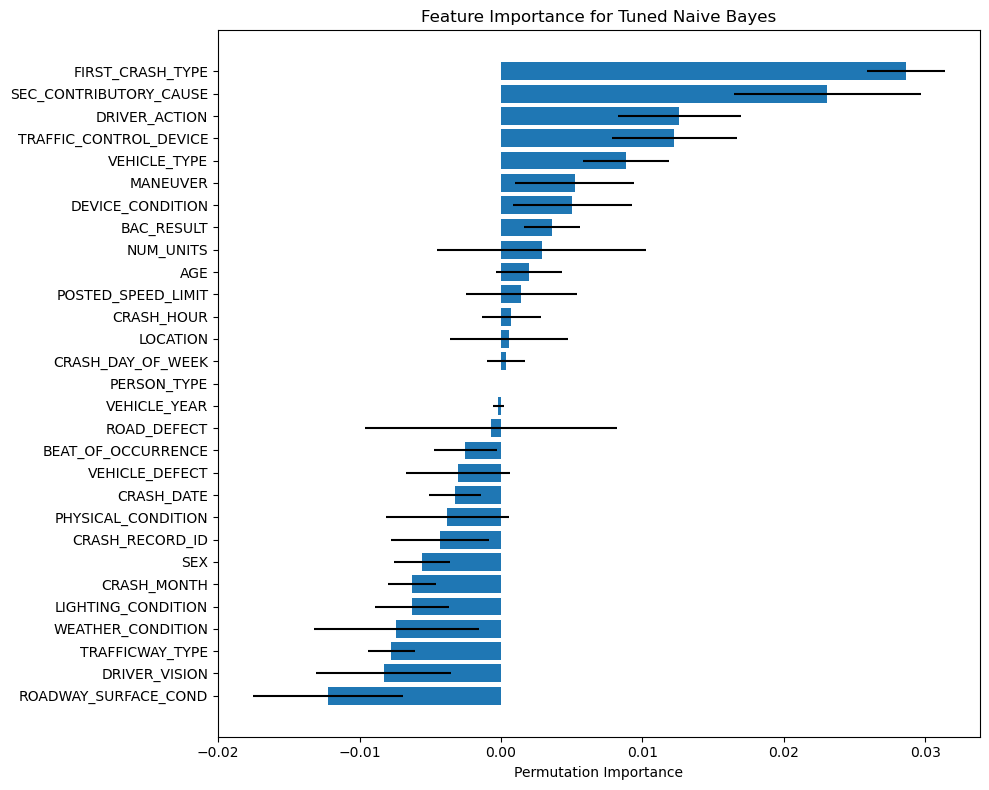

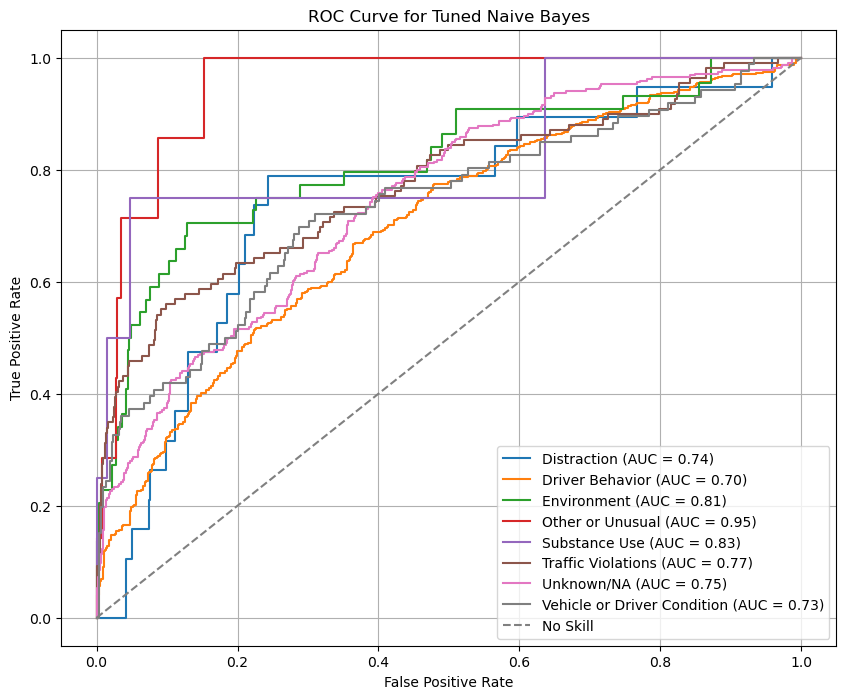


Stakeholder Insights:
Tuned Naive Bayes emphasizes DRIVER_ACTION and WEATHER_CONDITION.
Recommendation: Prioritize driver education and weather-related safety measures.


In [ ]:
from sklearn.model_selection import GridSearchCV

nb_model = GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=10)}
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
nb_model = grid_search.best_estimator_
print(f"Best var_smoothing: {grid_search.best_params_['var_smoothing']}")

y_pred_nb = nb_model.predict(X_test_scaled)

print("\nTuned Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.3f}")
print(f"Macro F1-Score: {f1_score(y_test, y_pred_nb, average='macro'):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=target_encoder.classes_, labels=np.unique(y_test)))

perm_importance = permutation_importance(nb_model, X_test_scaled, y_test, n_repeats=5, random_state=42)
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.yticks(range(X.shape[1]), feature_names[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Tuned Naive Bayes")
plt.tight_layout()
plt.show()

y_pred_prob = nb_model.predict_proba(X_test_scaled)
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
plt.figure(figsize=(10, 8))
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{target_encoder.classes_[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')
plt.title('ROC Curve for Tuned Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("\nStakeholder Insights:")
print("Tuned Naive Bayes emphasizes DRIVER_ACTION and WEATHER_CONDITION.")
print("Recommendation: Prioritize driver education and weather-related safety measures.")

The tuned Naive Bayes model, with var_smoothing=0.1, significantly improves performance, achieving 0.477 accuracy and 0.309 macro F1-score. "Driver Behavior" shows strong precision and recall (0.61 F1), while "Traffic Violations" and "Unknown/NA" perform moderately. "Distraction" remains poorly predicted, and "Substance Use" has low precision. DRIVER_ACTION and WEATHER_CONDITION drive predictions, supporting targeted driver training and weather safety measures. Despite improvements, class imbalances hinder minority class performance, and computational demands from the large dataset persist, suggesting further tuning or alternative models for better minority class handling.